In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")

In [29]:
colormap = {0:'black', 1:'red', 2:'blue'}
flower_colormap = {'setosa':'black','versicolor':'red','virginica':'blue'}
flower_map = {'setosa':0,'versicolor':1,'virginica':2}
def plot_region(model,dlim):
    d1lim = dlim[:2]
    d2lim = dlim[2:]
    d1_grid, d2_grid = np.meshgrid(np.arange(d1lim[0], d1lim[1], 0.02), np.arange(d2lim[0], d2lim[1], 0.02))
    X0 = d1_grid.ravel()
    X1 = d2_grid.ravel()
    
    d12_array = np.empty((len(X0),2))
    d12_array[:,0] = X0
    d12_array[:,1] = X1
    i=2
    
    y_array = model.predict(d12_array)
    y_array = np.array([flower_map[xx] for xx in lb.inverse_transform(y_array)])
    y_grid = y_array.reshape(d1_grid.shape)
    plt.contourf(d1_grid, d2_grid, y_grid, cmap='Pastel2')

In [30]:
def plot_region_scatter(model):

    plt.figure(figsize=(8,7))

    # Data with a scatter plot
    s = plt.scatter(x=X[:,0], y=X[:,1], c=[flower_colormap[yy] for yy in y])
    a = plt.axis()
    s.set_zorder(2)

    # plot the two regions
    plot_region(model,a)

    plt.xlabel(x0,fontsize=20)
    plt.ylabel(x1,fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

In [31]:
data = datasets.load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris['species'] = data.target_names[data.target]


iris.drop(columns=['sepal length (cm)','sepal width (cm)'],inplace=True)

x0 = 'petal_length'
x1 = 'petal_width'
iris.rename(columns={'petal length (cm)':x0,'petal width (cm)':x1},inplace=True)
iris.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


# extract input and output columns

In [32]:
X = iris[[x0,x1]].to_numpy()
y = iris['species'].to_numpy()

In [42]:
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

# encode class values as integers

In [34]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_ohe = lb.fit_transform(y)

In [35]:
y_ohe[:10,:]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [36]:
lb.inverse_transform(y_ohe[:10,:])

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

## Define The Neural Network Model

4 inputs -> [8 hidden nodes] -> 3 outputs

In [37]:
model = Sequential([
    Dense(5, input_dim=2, activation='relu'),
    Dense(3, activation="softmax") ])

model.compile(loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, y_ohe, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 1ms/step - loss: 2.3819 - accuracy: 0.3333
Epoch 2/500
5/5 [==============================] - 0s 1ms/step - loss: 2.2319 - accuracy: 0.3333
Epoch 3/500
5/5 [==============================] - 0s 860us/step - loss: 2.1291 - accuracy: 0.3333
Epoch 4/500
5/5 [==============================] - 0s 751us/step - loss: 2.0408 - accuracy: 0.3333
Epoch 5/500
5/5 [==============================] - 0s 1ms/step - loss: 1.9623 - accuracy: 0.3333
Epoch 6/500
5/5 [==============================] - 0s 800us/step - loss: 1.8933 - accuracy: 0.3333
Epoch 7/500
5/5 [==============================] - 0s 1ms/step - loss: 1.8281 - accuracy: 0.3333
Epoch 8/500
5/5 [==============================] - 0s 876us/step - loss: 1.7685 - accuracy: 0.3333
Epoch 9/500
5/5 [==============================] - 0s 936us/step - loss: 1.7133 - accuracy: 0.3333
Epoch 10/500
5/5 [==============================] - 0s 739us/step - loss: 1.6618 - accuracy: 0.3333
Epoch 11/500
5/5 

In [38]:
model = Sequential([
    Dense(5, input_dim=2, activation='relu'),
    Dense(3, activation="softmax") ])

model.compile(loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, y_ohe, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 1ms/step - loss: 2.4471 - accuracy: 0.3333
Epoch 2/500
5/5 [==============================] - 0s 1ms/step - loss: 2.3664 - accuracy: 0.3333
Epoch 3/500
5/5 [==============================] - 0s 1ms/step - loss: 2.3114 - accuracy: 0.3333
Epoch 4/500
5/5 [==============================] - 0s 1ms/step - loss: 2.2634 - accuracy: 0.3333
Epoch 5/500
5/5 [==============================] - 0s 1ms/step - loss: 2.2176 - accuracy: 0.3333
Epoch 6/500
5/5 [==============================] - 0s 1ms/step - loss: 2.1743 - accuracy: 0.3333
Epoch 7/500
5/5 [==============================] - 0s 1ms/step - loss: 2.1320 - accuracy: 0.3333
Epoch 8/500
5/5 [==============================] - 0s 845us/step - loss: 2.0920 - accuracy: 0.3333
Epoch 9/500
5/5 [==============================] - 0s 1ms/step - loss: 2.0523 - accuracy: 0.3333
Epoch 10/500
5/5 [==============================] - 0s 1ms/step - loss: 2.0128 - accuracy: 0.3333
Epoch 11/500
5/5 [=========

Text(0, 0.5, 'accuracy')

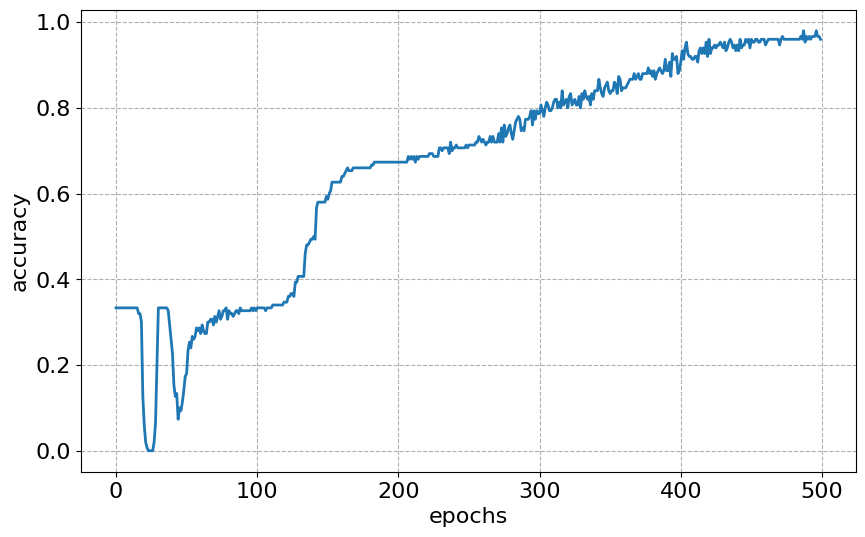

In [39]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], linewidth=2)
plt.grid(linestyle='--')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('epochs',fontsize=16)
plt.ylabel('accuracy',fontsize=16)

1341/1341 [==============================] - 1s 538us/step


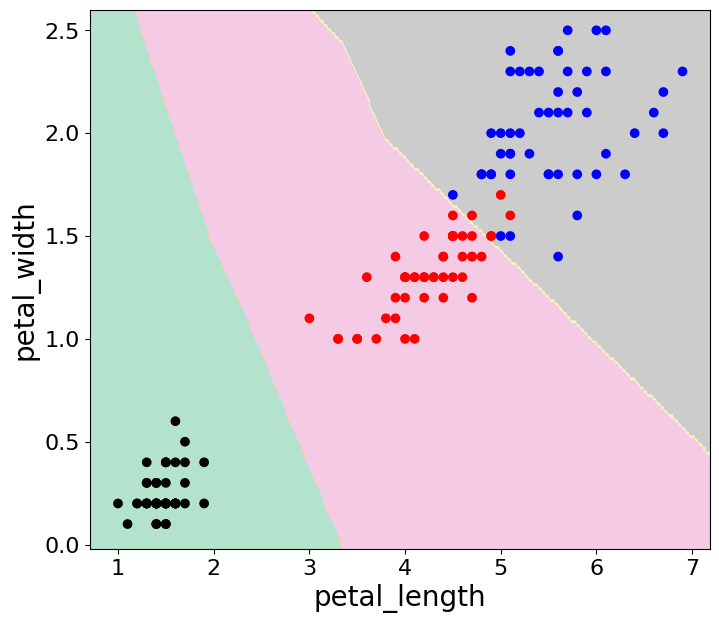

In [40]:
plot_region_scatter(model)